In [3]:
import tensorflow as tf

# 线性回归

In [10]:
x_train=[1,2,3]
y_train=[2,4,6]


In [16]:
w=tf.Variable(tf.random_normal([1]))
b=tf.Variable(tf.random_normal([1]))
x=tf.placeholder(tf.float32,shape=[None])
y=tf.placeholder(tf.float32,shape=[None])

y_=w*x+b

In [17]:
cost=tf.reduce_mean(tf.square(y_-y))
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [19]:

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())



In [20]:
for i in range(2001):
    sess.run(train,feed_dict={x:x_train,y:y_train})


In [22]:
print(sess.run(w),sess.run(b))

[ 1.9924916] [ 0.01706848]


In [23]:
sess.close()

In [59]:
x_data=[[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data=[[0],[0],[0],[1],[1],[1]]

In [60]:
x=tf.placeholder(tf.float32,shape=[None,2])
y=tf.placeholder(tf.float32,shape=[None,1])
w=tf.Variable(tf.random_normal([2,1]))
b=tf.Variable(tf.random_normal([1]))

In [61]:
y_=tf.sigmoid(tf.matmul(x,w)+b)
tf.reshape(y_,[-1,1])

<tf.Tensor 'Reshape_4:0' shape=(?, 1) dtype=float32>

In [62]:
cost=-tf.reduce_mean(y*tf.log(y_)+(1-y)*tf.log(1-y_))

In [63]:
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [64]:
predicted=tf.cast(y_>0.5,dtype=tf.float32)

In [65]:
sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
for i in range(10001):
    sess.run(train,feed_dict={x:x_data,y:y_data})
   

In [66]:
print(sess.run(w),sess.run(b))

[[ 1.45423472]
 [ 0.29696006]] [-5.45204496]


In [67]:
print(sess.run(predicted,feed_dict={x:x_data,y:y_data}))

[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]]


In [68]:
import numpy as np

In [70]:
xy=np.loadtxt('data-03-diabetes.csv',delimiter=',',dtype=np.float32)
xy.shape

(759, 9)

In [72]:
x_data=xy[:,0:-1]
y_data=xy[:,[-1]]
print(y_data.shape)

(759, 1)


In [73]:
x=tf.placeholder(tf.float32,shape=[759,8])
y=tf.placeholder(tf.float32,shape=[759,1])
w=tf.Variable(tf.random_normal([8,1]))
b=tf.Variable(tf.random_normal([1]))


In [74]:
y_=tf.sigmoid(tf.matmul(x,w)+b)
cost=-tf.reduce_mean(y*tf.log(y_)+(1-y)*tf.log(1-y_))
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [76]:
predicted=tf.cast(y_>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

In [77]:
sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(10001):
    sess.run(train,feed_dict={x:x_data,y:y_data})
    

In [78]:
print(sess.run(accuracy,feed_dict={x:x_data,y:y_data}))

0.762846


In [79]:
sess.close()

In [1]:
x_data=[
    [1,2,1,1],
    [2,1,3,2],
    [3,1,3,4],
    [4,1,5,5],
    [1,7,5,5],
    [1,2,5,6],
    [1,6,6,6],
    [1,7,7,7]
]
y_data=[
    [0,0,1],
    [0,0,1],
    [0,0,1],
    [0,1,0],
    [0,1,0],
    [0,1,0],
    [1,0,0],
    [1,0,0]
]

In [4]:
x=tf.placeholder(tf.float32,shape=[8,4])
y=tf.placeholder(tf.float32,shape=[8,3])
w=tf.Variable(tf.random_normal([4,3]))
b=tf.Variable(tf.random_normal([1,3]))

In [9]:
y_=tf.nn.softmax(tf.matmul(x,w)+b)
cost=-tf.reduce_sum(y*tf.log(y_))
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)
predicted=tf.arg_max(tf.nn.softmax(tf.matmul(x,w)+b),1)

In [7]:
sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(2001):
    sess.run(train,feed_dict={x:x_data,y:y_data})

In [10]:
print(sess.run(predicted,feed_dict={x:x_data,y:y_data}))

[2 2 2 1 1 1 0 0]


In [11]:
sess.close()

# softmax手写体识别

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_DATA/",one_hot=True)

Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz


In [10]:
x=tf.placeholder(tf.float32,shape=[None,784])
y=tf.placeholder(tf.float32,shape=[None,10])
w=tf.Variable(tf.random_normal([784,10]))
b=tf.Variable(tf.random_normal([1,10]))

y_=tf.nn.softmax(tf.matmul(x,w)+b)
_y=tf.matmul(x,w)+b
cost=tf.reduce_mean(-tf.reduce_sum(y*tf.log(y_),axis=1))
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=_y,labels=y))
train=tf.train.GradientDescentOptimizer(0.01).minimize(loss)
accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(y_,1),tf.arg_max(y,1)),tf.float32))

In [11]:
sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
epoch_num=15
batch_num=100
iter_num=int(mnist.train.num_examples/batch_num)

for epoch in range(epoch_num):
    for i in range(iter_num):
        batch_xs,batch_ys=mnist.train.next_batch(batch_num)
        sess.run(train,feed_dict={x:batch_xs,y:batch_ys})

In [12]:
print(sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels}))

0.7916


In [33]:
sess.close()

# 神经网络手写体识别

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_DATA/",one_hot=True)

Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz


In [11]:
x=tf.placeholder(tf.float32,shape=[None,784])
y=tf.placeholder(tf.float32,shape=[None,10])
W1=tf.Variable(tf.random_normal([784,256]))
b1=tf.Variable(tf.random_normal([1,256]))
L1=tf.nn.relu(tf.matmul(x,W1)+b1)
keep_prob=tf.placeholder(tf.float32)
L1=tf.nn.dropout(L1,keep_prob=keep_prob)

W2=tf.Variable(tf.random_normal([256,256]))
b2=tf.Variable(tf.random_normal([1,256]))
L2=tf.nn.relu(tf.matmul(L1,W2)+b2)
L2=tf.nn.dropout(L2,keep_prob=keep_prob)

W3=tf.Variable(tf.random_normal([256,10]))
b3=tf.Variable(tf.random_normal([1,10]))
_y=tf.matmul(L2,W3)+b3
y_=tf.nn.softmax(_y)
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=_y,labels=y))
train=tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(y_,1),tf.arg_max(y,1)),tf.float32))

In [12]:
sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
epoch_num=15
batch_num=100
iter_num=int(mnist.train.num_examples/batch_num)

for epoch in range(epoch_num):
    for i in range(iter_num):
        batch_xs,batch_ys=mnist.train.next_batch(batch_num)
        sess.run(train,feed_dict={x:batch_xs,y:batch_ys,keep_prob:0.7})

In [13]:
print('train accuracy:',sess.run(accuracy,feed_dict={x:mnist.train.images,y:mnist.train.labels,keep_prob:1}))
print('test accuracy:',sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:1}))

train accuracy: 0.877164
test accuracy: 0.8745


In [14]:
sess.close()

# 神经网络实现异或

In [19]:
import tensorflow as tf
import numpy as np

In [20]:
x_data=np.array([[0,1],[1,0],[0,0],[1,1]],dtype=np.float32)
y_data=np.array([[1],[1],[0],[0]],dtype=np.float32)

In [36]:
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)
W1=tf.Variable(tf.random_normal([2,2]))
b1=tf.Variable(tf.random_normal([2]))
L1=tf.sigmoid(tf.matmul(x,W1)+b1)

W2=tf.Variable(tf.random_normal([2,1]))
b2=tf.Variable(tf.random_normal([1]))
L2=tf.sigmoid(tf.matmul(L1,W2)+b2)

loss=-tf.reduce_mean(y*tf.log(L2)+(1-y)*tf.log(1-L2))
train=tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

predicted=tf.cast(L2>0.5,dtype=tf.float32)

In [37]:
sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
for step in range(10001):
    sess.run(train,feed_dict={x:x_data,y:y_data})


In [38]:
print(sess.run(predicted,feed_dict={x:x_data,y:y_data}))

[[ 1.]
 [ 1.]
 [ 0.]
 [ 0.]]


In [ ]:
sess.close()

# CNN卷积和最大池化

In [25]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(1, 3, 3, 1)


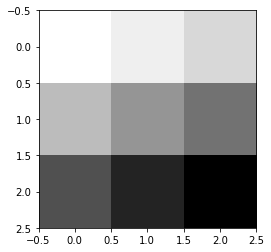

In [37]:
image=np.array([[
    [[1],[2],[3]],
    [[4],[5],[6]],
    [[7],[8],[9]]
]],dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3),cmap='Greys')

In [38]:
im_filter=np.array([
    [[[1]],[[1]]],
    [[[1]],[[1]]]
],dtype=np.float32)
print(im_filter.shape)

(2, 2, 1, 1)


In [44]:
conv2d=tf.nn.conv2d(image,im_filter,strides=[1,1,1,1],padding='VALID')
conv2d_img=conv2d.eval()

(1, 2, 2, 1)
[[[[ 12.]
   [ 16.]]

  [[ 24.]
   [ 28.]]]]


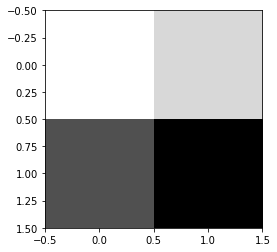

In [47]:
print(conv2d_img.shape)
print(conv2d_img)
plt.imshow(conv2d_img.reshape(2,2),cmap='Greys')

(1, 3, 3, 1)
[[[[ 12.]
   [ 16.]
   [  9.]]

  [[ 24.]
   [ 28.]
   [ 15.]]

  [[ 15.]
   [ 17.]
   [  9.]]]]


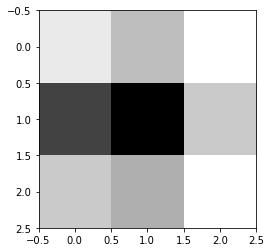

In [49]:
conv2d=tf.nn.conv2d(image,im_filter,strides=[1,1,1,1],padding='SAME')
conv2d_img=conv2d.eval()
print(conv2d_img.shape)
print(conv2d_img)
plt.imshow(conv2d_img.reshape(3,3),cmap='Greys')

In [53]:
im_filter=np.array([
    [[[1,10,-1]],[[1,10,-1]]],
    [[[1,10,-1]],[[1,10,-1]]]
],dtype=np.float32)
print(im_filter.shape)
conv2d=tf.nn.conv2d(image,im_filter,strides=[1,1,1,1],padding='SAME')
conv2d_img=conv2d.eval()
print(conv2d_img.shape)
conv2d_img=np.swapaxes(conv2d_img,0,3)
print(conv2d_img.shape)
for i,one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))

(2, 2, 1, 3)
(1, 3, 3, 3)
(3, 3, 3, 1)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]
[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


In [56]:
image=np.array([[
    [[1],[2],[3],[16]],
    [[4],[5],[6],[15]],
    [[7],[8],[9],[14]],
    [[10],[11],[12],[13]]
]],dtype=np.float32)
print(image.shape)
print(image.reshape(4,4))

(1, 4, 4, 1)
[[  1.   2.   3.  16.]
 [  4.   5.   6.  15.]
 [  7.   8.   9.  14.]
 [ 10.  11.  12.  13.]]


In [58]:
max_pool=tf.nn.max_pool(image,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
max_pool_image=max_pool.eval()
print(max_pool_image.shape)
print(max_pool_image.reshape(2,2))

(1, 2, 2, 1)
[[  5.  16.]
 [ 11.  14.]]


# CNN手写体识别基础

In [59]:
import tensorflow as tf

In [60]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_DATA/",one_hot=True)

Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz


In [64]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)
print(mnist.test.images.shape)
print(mnist.test.labels.shape)

(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


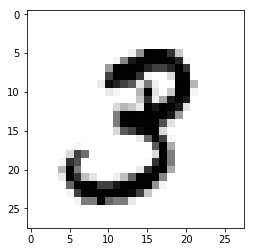

In [70]:
test_img=mnist.train.images[1].reshape(28,28)
plt.imshow(test_img,cmap='Greys')

In [72]:
test_img=test_img.reshape(1,28,28,1)
W1=tf.Variable(tf.random_normal([3,3,1,5],stddev=0.01,dtype=tf.float32))
sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

conv2d=tf.nn.conv2d(test_img,W1,strides=[1,2,2,1],padding='SAME')
conv2d_img=conv2d.eval()
print(conv2d_img.shape)

(1, 14, 14, 5)


In [75]:
conv2d_img=np.swapaxes(conv2d_img,0,3)
for i,one_img in enumerate(conv2d_img):
    plt.imshow(one_img.reshape(14,14),cmap='Greys')

ValueError: cannot reshape array of size 980 into shape (14,14)

In [21]:
sess.close()

# CNN手写体识别实践

In [22]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_DATA/",one_hot=True)

Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz


In [23]:
import tensorflow as tf

In [24]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [25]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [26]:
x=tf.placeholder(tf.float32,[None,784])
y_=tf.placeholder(tf.float32,[None,10])

In [27]:
#1st layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [28]:
x_image = tf.reshape(x, [-1,28,28,1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [29]:
#2nd layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [30]:
#1st full link
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [31]:
#drop out 
keep_prob=tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [32]:
#2nd full link
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

In [33]:
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step:",i,"training accuracy:",train_accuracy) 
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy:",accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step: 0 training accuracy: 0.18
step: 100 training accuracy: 0.88
step: 200 training accuracy: 0.84
step: 300 training accuracy: 0.92
step: 400 training accuracy: 0.94
step: 500 training accuracy: 0.92
step: 600 training accuracy: 0.96
step: 700 training accuracy: 0.94
step: 800 training accuracy: 0.98
step: 900 training accuracy: 0.98
step: 1000 training accuracy: 0.96
step: 1100 training accuracy: 1.0
step: 1200 training accuracy: 0.98
step: 1300 training accuracy: 0.96
step: 1400 training accuracy: 0.96
step: 1500 training accuracy: 1.0
step: 1600 training accuracy: 1.0
step: 1700 training accuracy: 0.98
step: 1800 training accuracy: 0.94
step: 1900 training accuracy: 1.0
step: 2000 training accuracy: 0.94
step: 2100 training accuracy: 0.96
step: 2200 training accuracy: 0.96


KeyboardInterrupt: 